# 3.2 활성화 함수 - Activation Function

In [1]:
%%html
<style>
table {float:left}
</style>

## 3.2.1 Sigmoid

* $h(x)$ = $1\over 1 + exp(-x)$

## 3.2.2 Step Function

In [2]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

#### $\to$ 이 구현은 단순하고 쉽지만, 인수 x는 실수만 받아들인다. 즉, numpy array를 인수로 넣을 수는 없다.

* #### numpy array를 넣을 수 있게 하기 위한 구현

In [3]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
import numpy as np

x = np.array([1.0, 5.0, -4.0])

y = x > 0
y

array([ True,  True, False])

#### $\to$ numpy array에 부등호 연산을 수행하면, 배열의 각각 원소에 부등호 연산을 수행한 bool배열이 생성된다.

#### $\to$ y의 원소를 bool에서 int형으로 바꿔준다.

In [5]:
y = y.astype(np.int)

y

array([1, 1, 0])

## 3.2.3 Step Function의 그래프

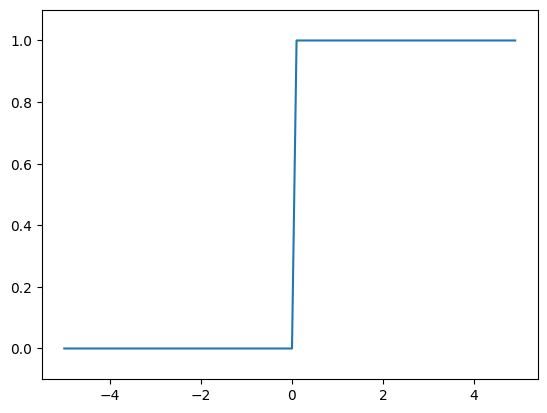

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.2.4 Sigmoid Function 구현

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])

sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

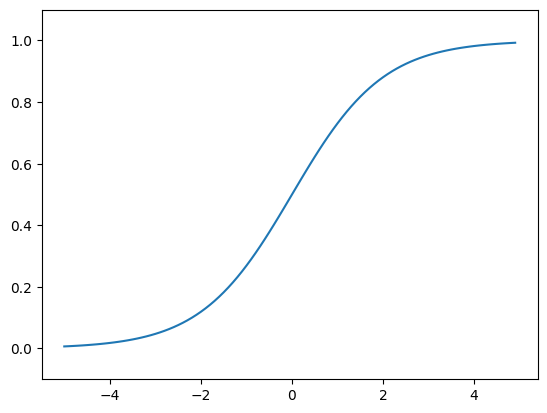

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.2.5 Step function과 Sigmoid function 그래프 비교

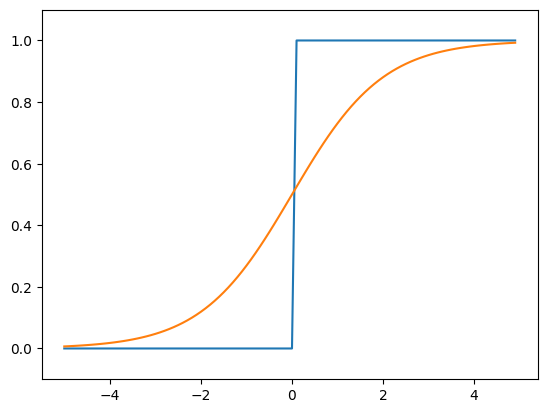

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
z = sigmoid(x)

plt.plot(x, y)
plt.plot(x, z)
plt.ylim(-0.1, 1.1)
plt.show()

#### $\to$ step function은 출력값이 0, 1인 반면에, sigmoid함수는 출력값이 0 ~ 1 까지 실수로 나타난다.

## 3.2.7 ReLU(Rectified Linear Unit) 함수

$h(x)=
\begin{cases}
x　(\;x>0)\\
0　(\;x\leq0)
\end{cases}$

In [11]:
def relu(x):
    return np.maximum(0, x)

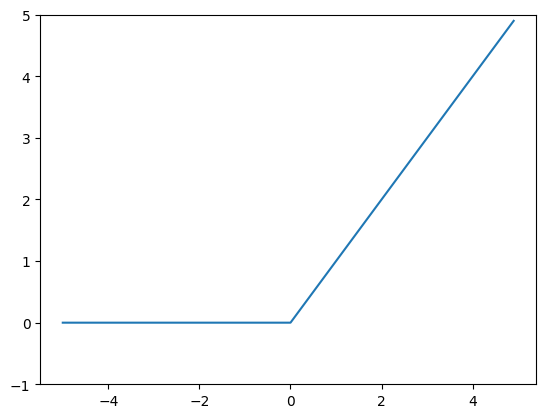

In [12]:
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1,5)
plt.show()

# 3.4 3층 신경망 구현

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMjQ3/MDAxNTI4NjEzNzA1OTEx.8LP6DXgs8QCQTeni1VRi9BueT5Uv_DHKpRYBPqi2tC4g.TQmRFx4Qp_1j5kqfyxxLFB1zBo7yIeMTskaQjwX73Pkg.PNG.ssdyka/fig_3-15.png?type=w2" align="left">

### 3.4.1 표기법 설명

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfNzIg/MDAxNTI4NjEzNzA2MzM0.j9QOoSA1XXHdyvrUWy0ZP_f_nWneMFSd1xIFpSRDxHsg.XXxHvb4p00Wu9Kzn_n-nB_lKfE2iRFVax14IwQhUejcg.PNG.ssdyka/fig_3-16.png?type=w2" align='left'>

### 3.4.2 각 층의 신호 전달 구현하기

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMjEx/MDAxNTI4NjEzNzA2NzUw.4uqh_gqJn64Ensn63s0fY1jpbspD5oilVYSu-ejMgs8g.Di4xipmNSMo-duyfkJNJAzfkqqS72dWbGSGxzhqcHjQg.PNG.ssdyka/fig_3-17.png?type=w2" align='left'>

 $\to$ 편향을 뜻하는 뉴런이 추가됨

#### 수식으로는 다음과 같다.
$a^{(1)}_1 = w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + b^{(1)}_1$
#### 여기에서 행렬의 곱(dot)을 이용하면 1층의 가중치부분을 다음과 같이 간소화 할 수 있다.
$\bf{A^{(1)}} = \bf{X}\bf{W^{(1)}} + \bf{B^{(1)}}$

#### 이 때 행렬 $\bf{A^{(1)}}, \bf{X}, \bf{W^{(1)}}, \bf{B^{(1)}}$ 은 다음과 같다.
$\bf{A^{(1)}} = \left(a^{(1)}_1　a^{(1)}_2　a^{(1)}_3 \right)$

$\bf{X} = \left(x_1 \quad x_2 \right)$

$\bf{B^{(1)}} = \left(b_1^{(1)} \quad b_2^{(1)} \quad b_3^{(1)}\right)$

$\bf{W^{(1)}} = \begin{pmatrix} w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\ w_{12}^{(1)} & w_{22}^{(1)} & w_{33}^{(1)} \end{pmatrix}$


In [13]:
import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2,)
(2, 3)
(3,)


#### 이어서 1층의 활성화함수에서의 처리를 살펴보자.

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMTUy/MDAxNTI4NjEzNzA3MTgy.iInlQtedOrR3cr83cHlHh5iBC97Rd3CAn8lsfil2pJwg.VY7Bft0dgHkae7sJ4UrgO9CchUygWMF7DhqdSlMvzm0g.PNG.ssdyka/fig_3-18.png?type=w2" align="left">

#### 그림과 같이 은닉층에서의 가중치 합(가중 신호와 편향의 총 합)을 $a$로 표기하고, 활성화 함수 $h()$로 변환된 신호를 $z$로 표기한다.
#### 여기에서는 활성화함수로 Sigmoid 함수를 사용할 것이다.

In [14]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


#### 이어서 1층에서 2층으로 가는 과정과 구현을 알아보자.

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMjg4/MDAxNTI4NjEzNzA3NTY4.cwhPzaPClfzWeATMD4HaoIlB8fISmeCpZ0F0dOMNYgwg.VCGI5jJ2ZPizDF-7smAQrHaU4-lt5D7edc3wvJXctBUg.PNG.ssdyka/fig_3-19.png?type=w2" align="left">

In [15]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


#### 마지막으로 2층에서 출력층으로의 신호 전달이다. 출력층의 구현도 그동안의 구현이랑 거의 동일하지만, 지금까지의 은닉층과 활성화 함수만 다르다.

In [16]:
def identitiy_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3

Y = identitiy_function(A3)

#### 여기에서는 항등함수인 identitiy function$()$을 정의하고, 이를 출력층의 활성화 함수로 사용하였다.

## 3.4.3 구현 정리

In [17]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identitiy_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


#### 여기에서는 init_network 와 forward 라는 함수를 정의했다.  
#### init_network 함수는 가중치와 편향을 초기화하고 이들을 딕셔너리 변수는 network 에 저장한다.
#### 이 딕셔너리 변수 network 에는 각 층에 필요한 매개변수(가중치와 편향)을 저장한다.
#### 그리고 forward 함수는 입력신호를 출력으로 변환하는 처리과정을 모두 구현하고 있다.
#### 함수 이름을 forward 라 한 것은 신호자 순전파임을 알리기 위함이다.

# 3.5 출력층 설계하기

* #### 신경망은 분류와 회귀에 모두 이용할 수 있다. 일반적으로 회귀에는 identitiy 함수를, 분류에는 softmax 함수를 사용한다.

## 3.5.1 Identitiy function과 Softmax function 구현하기

* #### 항등함수는 입력을 그대로 출력한다.

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTFfMjE5/MDAxNTI4NjU1ODQwNjM3.NP6nKVw8i7AgczhNeQByU_zPzLdZJJw1_V3V5t686BAg.ZeYEZ_yYC3Grv1ilNAMA-AxtDb3PHtKbxkA2wFq68yYg.PNG.ssdyka/fig_3-21.png?type=w2" align="left" height="100px" width="200px">

* #### 한편, 분류에서 사용하는 소프트맥스 함수의 식은 아래와 같다.
* ## $y_k = {e^{a_k} \over \sum_{i=1}^n {e^{a_i}} }$
* #### $n$은 출력층의 뉴런 수, $y_k$는 그 중 $k$번째 출력임을 뜻한다.
* #### 소프트맥스 함수의 분자는 입력신호 $a_k$의 지수함수, 분모는 모든 입력신호의 지수함수 합으로 구성된다.

* #### softmax 함수를 그림으로 나타내면 다음과 같다.

<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA2MTFfMTU0/MDAxNTI4NjU1ODQxMjA4.7Yl5u7yzJgjJGTD_vyyYw6IqGntaYTzNfwOPuQpyifAg.7tMZ2R7SLbkIiwpHnk8rYMnNVhxZdfkzWa9XyO4sDPog.PNG.ssdyka/fig_3-22.png?type=w2" align="left" height="100px" width="200px">

* #### 그럼 softmax 함수를 구현해보자.

In [18]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([0.3, 2.9, 4.0])

softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

## 3.5.2 Softmax 함수 구현 시 주의점

* #### Softmax함수를 컴퓨터로 계산 할 때는 오버플로가 발생하는 문제점이 있다.
* #### 이 문제를 해결하도록 Softmax 함수를 개선해보자.

## $y_k = {e^{a_k} \over \sum_{i=1}^n {e^{a_i}}} = {Ce^{a_k} \over C \sum_{i=1}^n {e^{a_i}}} = {{e^{a_k+\log{C}}} \over \sum_{i=1}^n {e^{a_i + \log{C}}}} = {e^{a_k + C'} \over \sum_{i=1}^n {e^{a_i + C'}}}$

* #### 마지막에 $\log{C}$ = $C'$으로 바꾼다.
* #### 구체적인 예를 살펴보자.

In [19]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(exp_a)

/tmp/ipykernel_81562/2777778323.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(exp_a)


NameError: name 'exp_a' is not defined

* #### 오버플로가 발생한 것을 볼 수 있다.
* #### 하지만 입력신호 중 최댓값을 빼주면 올바르게 계산할 수 있다.

In [20]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 3.5.3 Softmax 함수의 특징

In [21]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

* #### 보는 바와 같이 Softmax 함수의 출력은 0과 1 사이의 실수이다.
* #### <span style="background-color:yellow">또, 소프트맥스 함수의 출력의 총합은 1이다.</span>
* #### 이 성질 덕분에 Softmax 함수의 출력을 <span style="color:red">확률</span>로 해석할 수 있다.

## 3.5.4 출력층의 뉴런 수 정하기

* #### 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다.
* #### 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.